# IMPORTS

In [32]:
import pandas as pd 
from matplotlib import pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# DATA

In [35]:
data = pd.read_csv("toto.csv", sep = ";")
data.head()

,Day,Campaign_Name,DV360_Served_Impressions,DV360_Click
0,2020-02-17,Campaign 1,75493,185
1,2020-02-18,Campaign 1,75488,167
2,2020-02-19,Campaign 1,75274,158
3,2020-02-20,Campaign 1,75278,156
4,2020-02-21,Campaign 1,75848,170


## percent of day passed

In [41]:
jours_total = 48
jours_passe_pourcentage = [(i+1)/jours_total for i in range(len(data))]

## percent of achievement

In [42]:
buisness_event_obj = 3730879
buisness_event_delivre = list(data["DV360_Served_Impressions"].cumsum())

In [43]:
achievement_percent = [progress/buisness_event_obj for progress in buisness_event_delivre]

## trend

In [44]:
trend = [achievement_percent[i]/jours_passe_pourcentage[i] for i in range(len(data))]
data["trend"] = trend

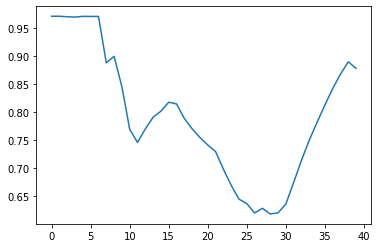

In [45]:
plt.plot(trend)

In [27]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data["Day"])
df['y'] = data['trend']

# PREDICTION WITH FACEBOOK PROPHET

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


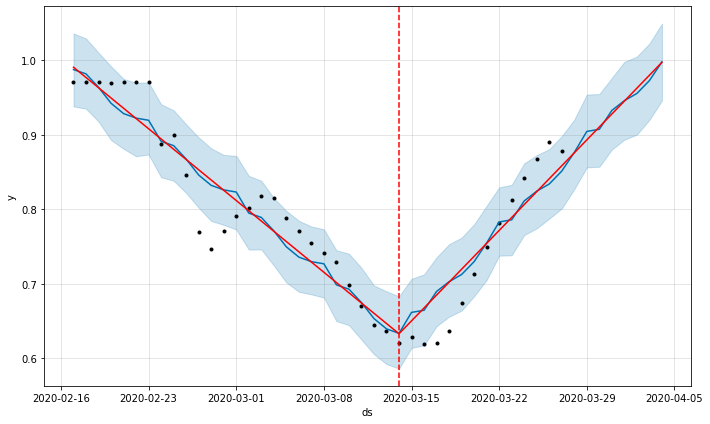

In [33]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=8, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

# WITH A REDUCED SAMPLE OF DATA

In [65]:
data_reduced = data.head(30)

C:\Users\mateg\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


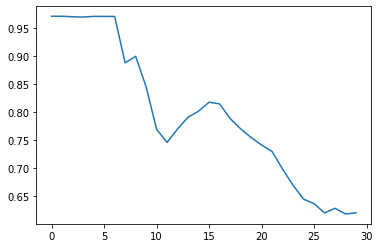

In [66]:
jours_total = 48
jours_passe_pourcentage = [(i+1)/jours_total for i in range(len(data_reduced))]

buisness_event_obj = 3730879
buisness_event_delivre = list(data_reduced["DV360_Served_Impressions"].cumsum())

achievement_percent = [progress/buisness_event_obj for progress in buisness_event_delivre]

trend_reduced = [achievement_percent[i]/jours_passe_pourcentage[i] for i in range(len(data_reduced))]
data_reduced["trend"] = trend_reduced

plt.plot(trend_reduced)

In [67]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data_reduced["Day"])
df['y'] = data_reduced['trend']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


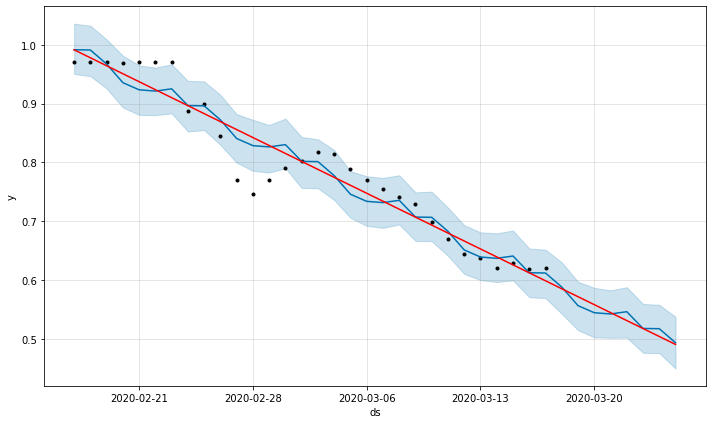

In [68]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=8, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)